# Model Comparison Notebook

This notebook aims to compare the performance of the top 3 models from three different approaches: Random Forest (RF), XGBoost, and LSTM. The evaluation will be performed using the test dataset spanning from **2024-11-22** to **2025-01-25**. 

### Objectives:
1. **Model Evaluation**: Assess the performance of the 3 best models from each category (RF, XGBoost, and LSTM) on the unseen test data.
2. **Performance Metrics**:
   - **Mean Squared Error (MSE)**: To measure the average squared difference between the predicted and actual values.
   - **Mean Absolute Error (MAE)**: To assess the average absolute differences between predicted and actual values.
   - **R² Score**: To evaluate how well the predictions explain the variability in the target data.
3. **Visualization**: Use visual plots to compare model performance and identify the most suitable models for deployment.

### Additional Notes:
- **Dataset**: The test dataset will include daily Open, High, Low, and Close values, ensuring consistency across all models.
- **Model Inputs**: Each model will use its optimal feature set determined during the respective feature selection phase.
- **Analysis**: Post evaluation, we will determine which models perform best for potential use in live deployment.

By the end of this notebook, we will have a clear understanding of which models are the most accurate and robust based on the selected metrics.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import joblib
from tensorflow.keras.models import load_model

2025-01-25 14:19:44.943707: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-25 14:19:44.946609: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-25 14:19:44.954251: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737807584.965883  188502 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737807584.969379  188502 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-25 14:19:44.982905: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

---
# Load, Format and Scale the test data

In [2]:
#read data
data = pd.read_csv("../data/raw/eur_usd_data.csv", parse_dates=["date"], index_col="date")

#format data
cutoff_date = "2024-11-22"
train_data = data[data.index < cutoff_date]
test_data = data[data.index > cutoff_date]
print(f"Training Data Shape: {train_data.shape}")
print(f"Test Data Shape: {test_data.shape}")

#scale data
scaler = StandardScaler()

scaled_train = scaler.fit_transform(train_data)
scaled_train = pd.DataFrame(scaled_train, columns=train_data.columns, index=train_data.index)

scaled_test = scaler.transform(test_data)
scaled_test = pd.DataFrame(scaled_test, columns=test_data.columns, index=test_data.index)

print("Testing Data (Scaled):")
scaled_test.head()

Training Data Shape: (2607, 4)
Test Data Shape: (44, 4)
Testing Data (Scaled):


,Open,High,Low,Close
date,,,,
2024-11-25,-1.443313,-1.327902,-1.401986,-1.443451
2024-11-26,-1.354975,-1.252852,-1.311513,-1.355127
2024-11-27,-1.220678,-1.287447,-1.210717,-1.220851
2024-11-28,-1.219736,-1.230167,-1.184814,-1.219909
2024-12-01,-1.252321,-1.324310,-1.336478,-1.253619


---
# Load Trained Models

In [3]:
models_dir = "../models/EURUSD_daily/"
models = {}


def load_model_with_error_handling(file_path, loader, model_name):
    try:
        model = loader(file_path)
        print(f"Successfully loaded: {model_name}")
        return model
    except Exception as e:
        print(f"Error loading {model_name}: {e}")
        return None


# Load Random Forest models
rf_model_files = [
    ("rf_138", f"{models_dir}rf_model_full_138.joblib"),
    ("rf_219", f"{models_dir}rf_model_full_219.joblib"),
    ("rf_300", f"{models_dir}rf_model_full_300.joblib")
]
for name, path in rf_model_files:
    if os.path.exists(path):
        models[name] = load_model_with_error_handling(path, joblib.load, name)
    else:
        print(f"File not found: {path}")


# Load XGBoost models
xgb_model_files = [
    ("xgb_277", f"{models_dir}xgb_model_full_277.joblib"),
    ("xgb_281", f"{models_dir}xgb_model_full_281.joblib"),
    ("xgb_283", f"{models_dir}xgb_model_full_283.joblib")
]
for name, path in xgb_model_files:
    if os.path.exists(path):
        models[name] = load_model_with_error_handling(path, joblib.load, name)
    else:
        print(f"File not found: {path}")
        

# Load LSTM models
lstm_model_files = [
    ("lstm_1", f"{models_dir}lstm_model_full_1.keras"),
    ("lstm_2", f"{models_dir}lstm_model_full_2.keras"),
    ("lstm_3", f"{models_dir}lstm_model_full_3.keras")
]
for name, path in lstm_model_files:
    if os.path.exists(path):
        models[name] = load_model_with_error_handling(path, load_model, name)
    else:
        print(f"File not found: {path}")
        

print("\nModel Loading Summary:")
for name, model in models.items():
    if model is not None:
        print(f"{name}: Successfully loaded")
    else:
        print(f"{name}: Failed to load")

Successfully loaded: rf_138
Successfully loaded: rf_219
Successfully loaded: rf_300
Successfully loaded: xgb_277
Successfully loaded: xgb_281
Successfully loaded: xgb_283
Successfully loaded: lstm_1
Successfully loaded: lstm_2


2025-01-25 14:19:46.469304: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Successfully loaded: lstm_3

Model Loading Summary:
rf_138: Successfully loaded
rf_219: Successfully loaded
rf_300: Successfully loaded
xgb_277: Successfully loaded
xgb_281: Successfully loaded
xgb_283: Successfully loaded
lstm_1: Successfully loaded
lstm_2: Successfully loaded
lstm_3: Successfully loaded


---
# Individual Model Testing and Evaluation

In [4]:
# Set up structure
results = {
    "model_name": [],
    "mse": [],
    "mae": [],
    "r2": [],
    "adjusted_r2": [],
    "aic": [],
    "bic": []
}

X_test = scaled_test.drop(columns=["Close"])
y_true = scaled_test["Close"]
print(f"X_test shape: {X_test.shape}")
print(f"y_true shape: {y_true.shape}")

X_test shape: (44, 3)
y_true shape: (44,)


## 1. Random forrest models:
---
#### Model 1 - rf_138

In [5]:
# Predict on the test set
model = models["rf_138"]
y_test_pred_rf1 = model.predict(X_test)

In [6]:
# Calculate metrics
mse = mean_squared_error(y_true, y_test_pred_rf1)
r2 = r2_score(y_true, y_test_pred_rf1)
mae = mean_absolute_error(y_true, y_test_pred_rf1)

print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"R² Score: {r2:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")

#save metrics
results["model_name"].append("rf_138")
results["mse"].append(mse)
results["mae"].append(mae)
results["r2"].append(r2)
results["adjusted_r2"].append(None)
results["aic"].append(None)
results["bic"].append(None)

Mean Squared Error (MSE): 0.000545
R² Score: 0.983302
Mean Absolute Error (MAE): 0.008133


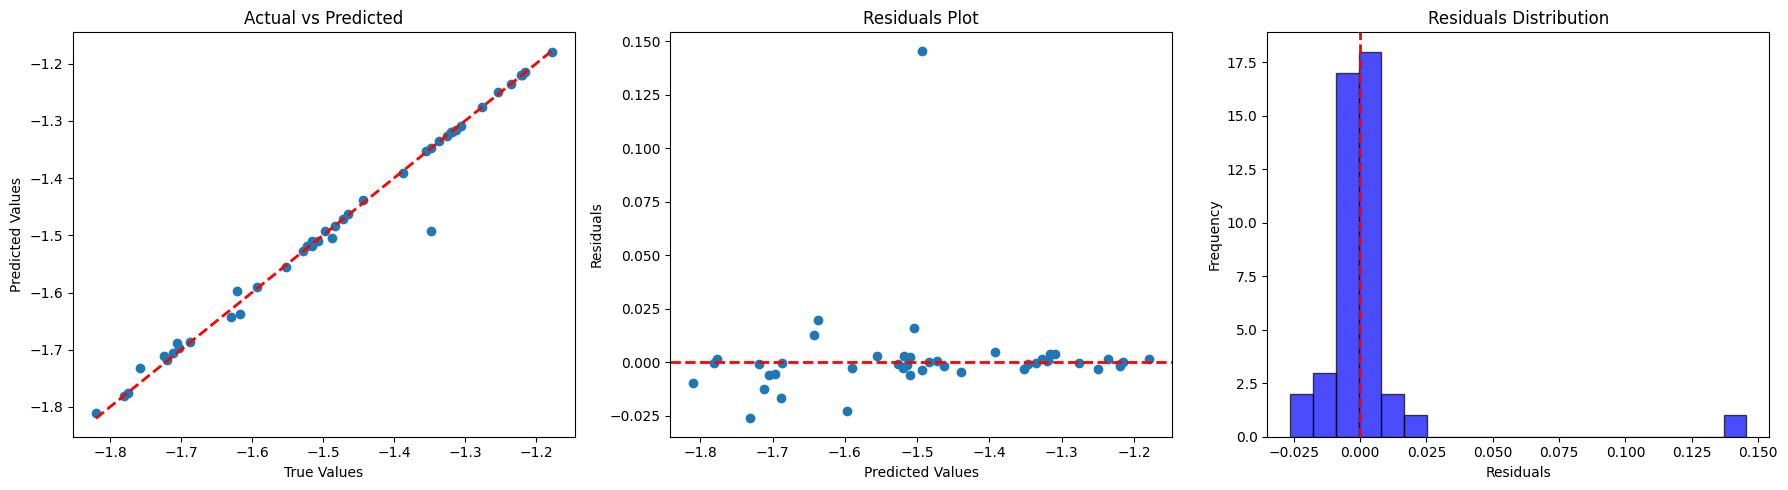

In [7]:
#Plot model fit
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Actual vs. Predicted
axes[0].scatter(y_true, y_test_pred_rf1)
axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', linewidth=2)
axes[0].set_title("Actual vs Predicted")
axes[0].set_xlabel("True Values")
axes[0].set_ylabel("Predicted Values")

# Plot 2: Residuals Plot
residuals = y_true - y_test_pred_rf1
axes[1].scatter(y_test_pred_rf1, residuals)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_title("Residuals Plot")
axes[1].set_xlabel("Predicted Values")
axes[1].set_ylabel("Residuals")

# Plot 3: Predicted vs Residuals Density
axes[2].hist(residuals, bins=20, alpha=0.7, color='blue', edgecolor='black')
axes[2].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[2].set_title("Residuals Distribution")
axes[2].set_xlabel("Residuals")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### Observations from the Graphs

1. **Actual vs Predicted**:
   - The points are closely aligned along the red dashed line, indicating that the model predictions are highly correlated with the true values.
   - This suggests the model captures the general trends in the data well.


2. **Residuals Plot**:
   - The residuals are mostly scattered randomly around the zero line, which is a good indication that the model does not exhibit systematic bias.
   - However, there is one noticeable outlier with a large residual, which may require further investigation.


3. **Residuals Distribution**:
   - The histogram shows that residuals are centered around zero and exhibit a roughly symmetric distribution, aligning with the assumption of normality.
   - The outlier visible in the residuals plot is also apparent here as a bar far from the center.

These plots collectively indicate that the model performs well, but the outlier(s) might require closer examination to ensure they do not unduly influence the model's performance.

---
#### Model 2 - rf_219

In [8]:
# Predict on the test set
model = models["rf_219"]
y_test_pred_rf2 = model.predict(X_test)

In [9]:
# Calculate metrics
mse = mean_squared_error(y_true, y_test_pred_rf2)
r2 = r2_score(y_true, y_test_pred_rf2)
mae = mean_absolute_error(y_true, y_test_pred_rf2)

print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"R² Score: {r2:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")

#save metrics
results["model_name"].append("rf_219")
results["mse"].append(mse)
results["mae"].append(mae)
results["r2"].append(r2)
results["adjusted_r2"].append(None)
results["aic"].append(None)
results["bic"].append(None)

Mean Squared Error (MSE): 0.000553
R² Score: 0.983058
Mean Absolute Error (MAE): 0.008546


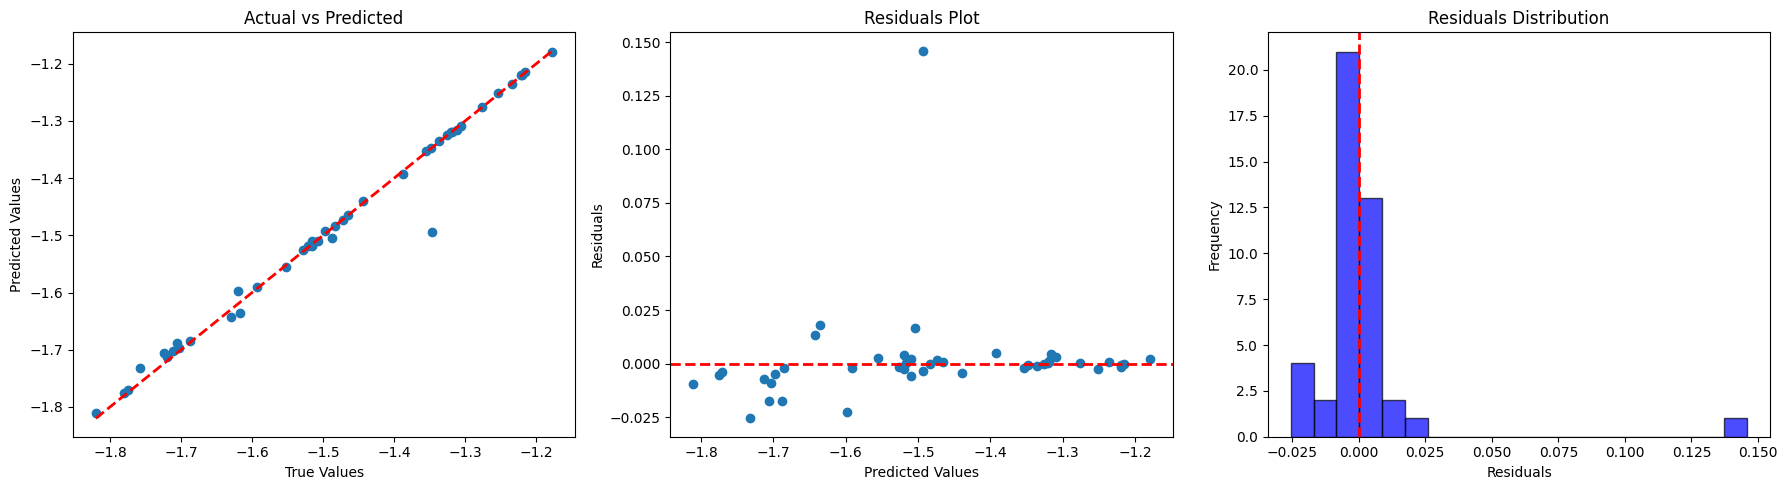

In [10]:
#Plot model fit
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Actual vs. Predicted
axes[0].scatter(y_true, y_test_pred_rf2)
axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', linewidth=2)
axes[0].set_title("Actual vs Predicted")
axes[0].set_xlabel("True Values")
axes[0].set_ylabel("Predicted Values")

# Plot 2: Residuals Plot
residuals = y_true - y_test_pred_rf2
axes[1].scatter(y_test_pred_rf2, residuals)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_title("Residuals Plot")
axes[1].set_xlabel("Predicted Values")
axes[1].set_ylabel("Residuals")

# Plot 3: Predicted vs Residuals Density
axes[2].hist(residuals, bins=20, alpha=0.7, color='blue', edgecolor='black')
axes[2].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[2].set_title("Residuals Distribution")
axes[2].set_xlabel("Residuals")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### Observations from the Graphs
Results is similar to RF model 1 (rf_138)
1. **Actual vs Predicted**:
   - The points are closely aligned along the red dashed line, indicating that the model predictions are highly correlated with the true values.
   - This suggests the model captures the general trends in the data well.


2. **Residuals Plot**:
   - The residuals are mostly scattered randomly around the zero line, which is a good indication that the model does not exhibit systematic bias.
   - However, there is one noticeable outlier with a large residual, which may require further investigation.


3. **Residuals Distribution**:
   - The histogram shows that residuals are centered around zero and exhibit a roughly symmetric distribution, aligning with the assumption of normality.
   - The outlier visible in the residuals plot is also apparent here as a bar far from the center.

These plots collectively indicate that the model performs well, but the outlier(s) might require closer examination to ensure they do not unduly influence the model's performance.

---
#### Model 3 - rf_300

In [11]:
# Predict on the test set
model = models["rf_300"]
y_test_pred_rf3 = model.predict(X_test)

In [12]:
# Calculate metrics
mse = mean_squared_error(y_true, y_test_pred_rf3)
r2 = r2_score(y_true, y_test_pred_rf3)
mae = mean_absolute_error(y_true, y_test_pred_rf3)

print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"R² Score: {r2:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")

#save metrics
results["model_name"].append("rf_300")
results["mse"].append(mse)
results["mae"].append(mae)
results["r2"].append(r2)
results["adjusted_r2"].append(None)
results["aic"].append(None)
results["bic"].append(None)

Mean Squared Error (MSE): 0.000553
R² Score: 0.983058
Mean Absolute Error (MAE): 0.008546


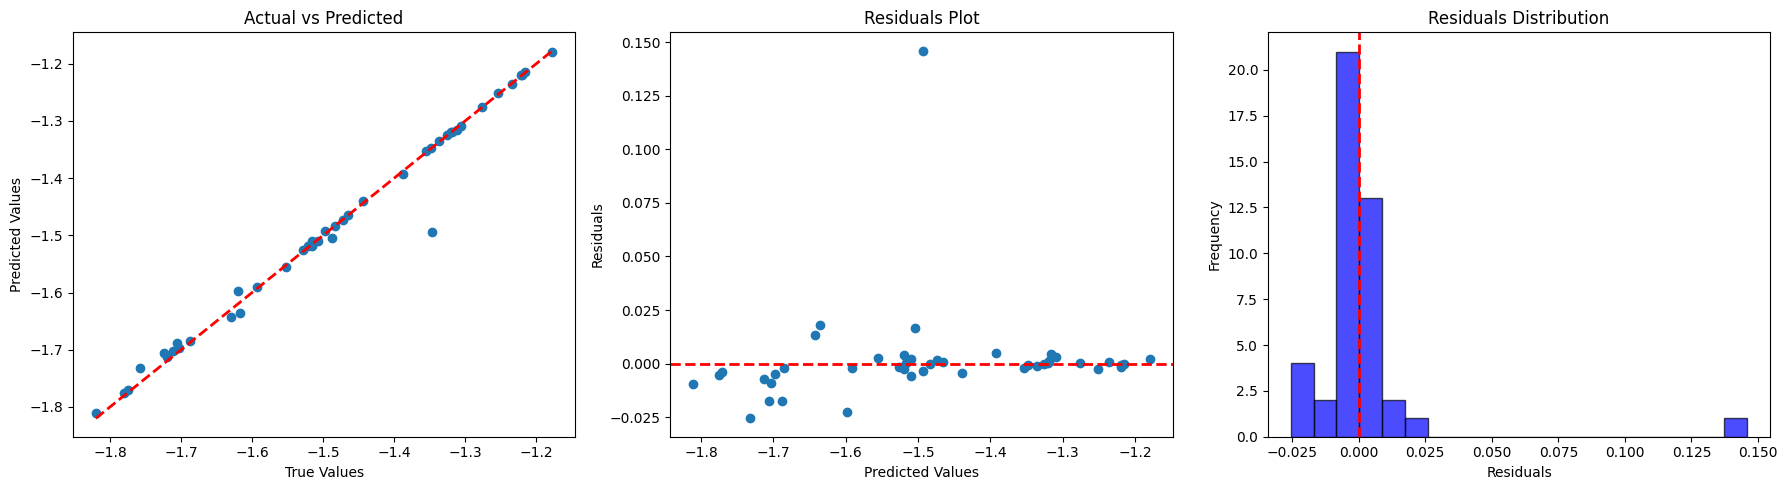

In [13]:
#Plot model fit
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Actual vs. Predicted
axes[0].scatter(y_true, y_test_pred_rf3)
axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', linewidth=2)
axes[0].set_title("Actual vs Predicted")
axes[0].set_xlabel("True Values")
axes[0].set_ylabel("Predicted Values")

# Plot 2: Residuals Plot
residuals = y_true - y_test_pred_rf3
axes[1].scatter(y_test_pred_rf3, residuals)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_title("Residuals Plot")
axes[1].set_xlabel("Predicted Values")
axes[1].set_ylabel("Residuals")

# Plot 3: Predicted vs Residuals Density
axes[2].hist(residuals, bins=20, alpha=0.7, color='blue', edgecolor='black')
axes[2].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[2].set_title("Residuals Distribution")
axes[2].set_xlabel("Residuals")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### Observations from the Graphs
Results are almost identical to RF model 2 (rf_219)
1. **Actual vs Predicted**:
   - The points are closely aligned along the red dashed line, indicating that the model predictions are highly correlated with the true values.
   - This suggests the model captures the general trends in the data well.


2. **Residuals Plot**:
   - The residuals are mostly scattered randomly around the zero line, which is a good indication that the model does not exhibit systematic bias.
   - However, there is one noticeable outlier with a large residual, which may require further investigation.


3. **Residuals Distribution**:
   - The histogram shows that residuals are centered around zero and exhibit a roughly symmetric distribution, aligning with the assumption of normality.
   - The outlier visible in the residuals plot is also apparent here as a bar far from the center.

These plots collectively indicate that the model performs well, but the outlier(s) might require closer examination to ensure they do not unduly influence the model's performance.

---
## 1. XGBoost models:
---
#### Model 1 - xgb_277
xgb_281:

xgb_283: